In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2NoZXJ5bGtvdWFkaW8vRG9jdW1lbnRzL1JlcG9zaXRvcmllcy9wZXJzb25hbC13ZWJzaXRlLzNBL2dlc3Rpb25fYWN0aWZz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1731323889.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1731323905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1731323906.0, "/Library/Developer/CommandLineT

/var/folders/4g/2x7xwt6106l13nxqljfks4gm0000gn/T/ipykernel_21738/59611623.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
# ! pip install yfinance
from datetime import datetime, timedelta
import yfinance as yf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/Users/cherylkouadio/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
def get_data(start_date, end_date, index_ticker, tickers, column="Close"):
    """
    Extraction de données de cours d'actions
    Args:
        start_date (str): Date de début au format 'YYYY-MM-DD'.
        end_date (str): Date de fin au format 'YYYY-MM-DD'.

    Returns:
        dict: Contient les prix historiques des indices
    """
    # Extraction des volumes historiques des composants
    data = yf.download(tickers, start=start_date, end=end_date, auto_adjust =True)[column]

    # Extraction des volumes historiques de l'indice CAC 40
    index = yf.download(index_ticker, start=start_date, end=end_date, auto_adjust =True)[column]

    return {
        "portfolio_data": data,
        "benchmark_data": index,
    }

end_date = datetime.now()
start_date = end_date - timedelta(days=3*31)

selected_assets = {
    "AC.PA": "Accor",
    "AI.PA": "Air Liquide",
    "AIR.PA": "Airbus",
    "MT.AS": "ArcelorMittal",
    "CS.PA": "AXA",
    "BNP.PA": "BNP Paribas",
    "EN.PA": "Bouygues",
    "BVI.PA": "Bureau Veritas",
    "CAP.PA": "Capgemini",
    "CA.PA": "Carrefour",
    "ACA.PA": "Crédit Agricole",
    "BN.PA": "Danone",
    "DSY.PA": "Dassault Systèmes",
    "EDEN.PA": "Edenred",
    "ENGI.PA": "Engie",
    "EL.PA": "EssilorLuxottica",
    "ERF.PA": "Eurofins Scientific",
    "RMS.PA": "Hermès",
    "KER.PA": "Kering",
    "LR.PA": "Legrand",
    "OR.PA": "L'Oréal",
    "MC.PA": "LVMH",
    "ML.PA": "Michelin",
    "ORA.PA": "Orange",
    "RI.PA": "Pernod Ricard",
    "PUB.PA": "Publicis",
    "RNO.PA": "Renault",
    "SAF.PA": "Safran",
    "SGO.PA": "Saint-Gobain",
    "SAN.PA": "Sanofi",
    "SU.PA": "Schneider Electric",
    "GLE.PA": "Société Générale",
    "STLA": "Stellantis",
    "STMPA.PA": "STMicroelectronics",
    "TEP.PA": "Teleperformance",
    "HO.PA": "Thales",
    "TTE.PA": "TotalEnergies",
    "UNBLF": "Unibail-Rodamco-Westfield",
    "VIE.PA": "Veolia",
    "DG.PA": "Vinci",
}

index = "^FCHI"

assets_ticker  = list(selected_assets.keys())

data = get_data(start_date,end_date, index, assets_ticker, column="Volume")

[                       0%                       ]

[*****                 10%                       ]  4 of 40 completed

[*****                 10%                       ]  4 of 40 completed

[*******               15%                       ]  6 of 40 completed

[*********             18%                       ]  7 of 40 completed

[**********            20%                       ]  8 of 40 completed

[***********           22%                       ]  9 of 40 completed

[************          25%                       ]  10 of 40 completed

[************          25%                       ]  10 of 40 completed

[***************       32%                       ]  13 of 40 completed

[*****************     35%                       ]  14 of 40 completed

[******************    38%                       ]  15 of 40 completed

[*******************   40%                       ]  16 of 40 completed

[********************  42%                       ]  17 of 40 completed

[**********************45%                       ]  18 of 40 completed

[**********************45%                       ]  18 of 40 completed

[**********************50%                       ]  20 of 40 completed

[**********************52%                       ]  21 of 40 completed

[**********************55%*                      ]  22 of 40 completed

[**********************57%**                     ]  23 of 40 completed

[**********************60%****                   ]  24 of 40 completed

[**********************62%*****                  ]  25 of 40 completed

[**********************65%******                 ]  26 of 40 completed

[**********************70%*********              ]  28 of 40 completed

[**********************72%**********             ]  29 of 40 completed

[**********************72%**********             ]  29 of 40 completed

[**********************78%************           ]  31 of 40 completed

[**********************78%************           ]  31 of 40 completed

[**********************82%**************         ]  33 of 40 completed

[**********************85%****************       ]  34 of 40 completed

[**********************88%*****************      ]  35 of 40 completed

[**********************90%******************     ]  36 of 40 completed

[**********************92%*******************    ]  37 of 40 completed

[**********************92%*******************    ]  37 of 40 completed

[*********************100%***********************]  40 of 40 completed

[*********************100%***********************]  1 of 1 completed

In [4]:
portfolio_data = data["portfolio_data"]
portfolio_data.head()

Ticker,AC.PA,ACA.PA,AI.PA,AIR.PA,BN.PA,BNP.PA,BVI.PA,CA.PA,CAP.PA,CS.PA,...,SAF.PA,SAN.PA,SGO.PA,STLA,STMPA.PA,SU.PA,TEP.PA,TTE.PA,UNBLF,VIE.PA
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-07,698430.0,13751044.0,813490.0,1091627.0,1059857.0,5322315.0,646260.0,2794758.0,326259.0,4163091.0,...,576180.0,1527095.0,1430888.0,6819700.0,2082219.0,892806.0,404002.0,3786884.0,0.0,2809097.0
2024-11-08,640605.0,4781311.0,712553.0,1541520.0,1045775.0,4731196.0,367776.0,4129105.0,340411.0,2828675.0,...,672105.0,1414195.0,1037715.0,8197900.0,1881978.0,737207.0,288437.0,3327420.0,100.0,2139007.0
2024-11-11,544390.0,3965216.0,615456.0,1013673.0,1139407.0,3062744.0,621229.0,2577272.0,332633.0,2860191.0,...,678397.0,1208511.0,877175.0,7181500.0,2067857.0,808043.0,268883.0,3669304.0,100.0,1474874.0
2024-11-12,476433.0,6774868.0,957769.0,1451643.0,1319645.0,3871602.0,503435.0,2216855.0,419941.0,4554097.0,...,928357.0,1941126.0,1059643.0,5832100.0,3211099.0,939216.0,376479.0,5104044.0,0.0,2051518.0
2024-11-13,503706.0,5911519.0,752386.0,1381466.0,1085131.0,2782805.0,674357.0,1985037.0,520292.0,3538137.0,...,665527.0,1394445.0,1431965.0,6821700.0,2456917.0,990623.0,206989.0,4171178.0,100.0,2188795.0


In [5]:
portfolio_data.index

DatetimeIndex(['2024-11-07', '2024-11-08', '2024-11-11', '2024-11-12',
               '2024-11-13', '2024-11-14', '2024-11-15', '2024-11-18',
               '2024-11-19', '2024-11-20', '2024-11-21', '2024-11-22',
               '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-28',
               '2024-11-29', '2024-12-02', '2024-12-03', '2024-12-04',
               '2024-12-05', '2024-12-06', '2024-12-09', '2024-12-10',
               '2024-12-11', '2024-12-12', '2024-12-13', '2024-12-16',
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31', '2025-01-02', '2025-01-03',
               '2025-01-06', '2025-01-07', '2025-01-08', '2025-01-09',
               '2025-01-10', '2025-01-13', '2025-01-14', '2025-01-15',
               '2025-01-16', '2025-01-17', '2025-01-20', '2025-01-21',
               '2025-01-22', '2025-01-23', '2025-01-24', '2025-01-27',
      

In [6]:
# Calcul des ADV 3Mois

adv_3m = {portfolio_data[ticker].mean() for ticker in assets_ticker}
adv_3m

ADV = pd.DataFrame(adv_3m, index = assets_ticker, columns = ["ADV"])
ADV.head()

,ADV
AC.PA,2.166276e+06
AI.PA,6.087734e+05
AIR.PA,3.842644e+05
MT.AS,2.288744e+05
CS.PA,5.688459e+05


In [7]:
# Génération des quantités
np.random.seed(123)
ADV["Quantity"] =  round(1.5 * np.random.rand(len(ADV["ADV"])) * ADV["ADV"])
ADV.head()

,ADV,Quantity
AC.PA,2.166276e+06,2263116.0
AI.PA,6.087734e+05,261291.0
AIR.PA,3.842644e+05,130756.0
MT.AS,2.288744e+05,189273.0
CS.PA,5.688459e+05,613900.0


In [8]:
market_depth = 20/100
ADV["Quantity in 1day"] = round(ADV["Quantity"] * market_depth)
ADV.head()

,ADV,Quantity,Quantity in 1day
AC.PA,2.166276e+06,2263116.0,452623.0
AI.PA,6.087734e+05,261291.0,52258.0
AIR.PA,3.842644e+05,130756.0,26151.0
MT.AS,2.288744e+05,189273.0,37855.0
CS.PA,5.688459e+05,613900.0,122780.0


In [9]:
# Calcul du nombre de jours de liquidation
ADV["Days of liquidation"] = ADV["Quantity"]/ADV["Quantity in 1day"]

# floor to 1 and round
ADV["Days of liquidation"] = ADV["Days of liquidation"].apply(lambda x: max(1, round(x)))
ADV.head()

,ADV,Quantity,Quantity in 1day,Days of liquidation
AC.PA,2.166276e+06,2263116.0,452623.0,5
AI.PA,6.087734e+05,261291.0,52258.0,5
AIR.PA,3.842644e+05,130756.0,26151.0,5
MT.AS,2.288744e+05,189273.0,37855.0,5
CS.PA,5.688459e+05,613900.0,122780.0,5


In [10]:
print(f"Temps de liquidation du portefeuille : {ADV['Days of liquidation'].max()} jours")

Temps de liquidation du portefeuille : 5 jours


In [11]:
# Initialisation d'une colonne pour suivre les quantités liquidées
ADV["Quantity liquidated"] = 0  # Initialement, rien n'est liquidé

# Création d'une liste pour suivre la liquidation jour par jour
# Au jour 0, on a liquidé 0. La colonne 0 sert de quantité initiale
quantity_liquidated_per_day = [ADV["Quantity"]]

for nb_day in range(1, 8):  # Pour chaque jour
    # Calculer la quantité liquide au jour i
    liquidated_today = np.minimum(ADV["Quantity in 1day"], ADV["Quantity"] - ADV["Quantity liquidated"])
    
    # Mettre à jour les quantités liquidées dans le DataFrame
    ADV["Quantity liquidated"] += liquidated_today
    
    # Stocker les quantités liquidées ce jour dans une liste
    quantity_liquidated_per_day.append(liquidated_today)

# Conversion des résultats jour par jour en DataFrame pour plus de clarté
liquidation_df = pd.DataFrame(quantity_liquidated_per_day).T
liquidation_df.columns = [f"{i}" for i in range(len(quantity_liquidated_per_day))]

liquidation_df.head()

,0,1,2,3,4,5,6,7
AC.PA,2263116.0,452623.0,452623.0,452623.0,452623.0,452623.0,1.0,0.0
AI.PA,261291.0,52258.0,52258.0,52258.0,52258.0,52258.0,1.0,0.0
AIR.PA,130756.0,26151.0,26151.0,26151.0,26151.0,26151.0,1.0,0.0
MT.AS,189273.0,37855.0,37855.0,37855.0,37855.0,37853.0,0.0,0.0
CS.PA,613900.0,122780.0,122780.0,122780.0,122780.0,122780.0,0.0,0.0


In [12]:
end_date = datetime.now()
start_date = end_date - timedelta(days=1)
price_data = get_data(start_date, end_date, index, assets_ticker, column="Close")

price_data["portfolio_data"].head()
price_dict = price_data["portfolio_data"].iloc[-1].to_dict()

[                       0%                       ]

[                       0%                       ]

[                       0%                       ]

[**********            20%                       ]  8 of 40 completed

[**********            20%                       ]  8 of 40 completed

[************          25%                       ]  10 of 40 completed

[************          25%                       ]  10 of 40 completed

[************          25%                       ]  10 of 40 completed

[*******************   40%                       ]  16 of 40 completed

[********************  42%                       ]  17 of 40 completed

[**********************45%                       ]  18 of 40 completed

[**********************48%                       ]  19 of 40 completed

[**********************50%                       ]  20 of 40 completed

[**********************50%                       ]  20 of 40 completed

[**********************50%                       ]  20 of 40 completed

[**********************60%****                   ]  24 of 40 completed

[**********************62%*****                  ]  25 of 40 completed

[**********************65%******                 ]  26 of 40 completed

[**********************70%*********              ]  28 of 40 completed

[**********************72%**********             ]  29 of 40 completed

[**********************75%***********            ]  30 of 40 completed

[**********************78%************           ]  31 of 40 completed

[**********************78%************           ]  31 of 40 completed

[**********************82%**************         ]  33 of 40 completed

[**********************85%****************       ]  34 of 40 completed

[**********************88%*****************      ]  35 of 40 completed

[**********************92%*******************    ]  37 of 40 completed

[**********************98%********************** ]  39 of 40 completed

[*********************100%***********************]  40 of 40 completed

[*********************100%***********************]  1 of 1 completed

In [13]:
# Valeur liquide des actions par jour de liquidation
market_value =[
    price_dict[ticker] * liquidation_df.loc[ticker]
    for ticker in selected_assets
]

market_value = pd.DataFrame(market_value, index=selected_assets, columns=liquidation_df.columns)
market_value.head()

,0,1,2,3,4,5,6,7
AC.PA,1.129295e+08,2.258589e+07,2.258589e+07,2.258589e+07,2.258589e+07,2.258589e+07,49.900002,0.0
AI.PA,4.418953e+07,8.837873e+06,8.837873e+06,8.837873e+06,8.837873e+06,8.837873e+06,169.119995,0.0
AIR.PA,2.182579e+07,4.365125e+06,4.365125e+06,4.365125e+06,4.365125e+06,4.365125e+06,166.919998,0.0
MT.AS,5.178509e+06,1.035713e+06,1.035713e+06,1.035713e+06,1.035713e+06,1.035658e+06,0.000000,0.0
CS.PA,2.305808e+07,4.611617e+06,4.611617e+06,4.611617e+06,4.611617e+06,4.611617e+06,0.000000,0.0


In [14]:
# Calcul de la valeur de marché initiale et totale
market_value_0 = market_value.iloc[:, 0]
total_market_value_0 = market_value_0.sum()

# Calcul de la valeur de marché cumulée (à partir de la colonne 1)
cumsum_market_value = market_value.iloc[:, 1:].cumsum(axis=1)
cumsum_total_market_value = market_value.iloc[:, 1:].sum(axis=0).cumsum()
cumsum_market_value = pd.concat([pd.DataFrame(0, index=market_value.index, columns=[0]), cumsum_market_value], axis=1)
cumsum_total_market_value = pd.concat([pd.Series(0, index=[0]), cumsum_total_market_value])

weights = {}
for ticker in assets_ticker :
    weights[ticker] = (market_value_0.loc[ticker] - cumsum_market_value.loc[ticker]) / (total_market_value_0 - cumsum_total_market_value)

weights = pd.DataFrame(weights).T
weights.head()

,0,1,2,3,4,5,6,7
AC.PA,0.010344,0.010344,0.010344,0.010344,0.010344,0.012815,NaN,NaN
AI.PA,0.004048,0.004048,0.004048,0.004048,0.004048,0.043432,NaN,NaN
AIR.PA,0.001999,0.001999,0.001999,0.001999,0.001999,0.042867,NaN,NaN
MT.AS,0.000474,0.000474,0.000474,0.000474,0.000474,0.000000,NaN,NaN
CS.PA,0.002112,0.002112,0.002112,0.002112,0.002112,0.000000,NaN,NaN


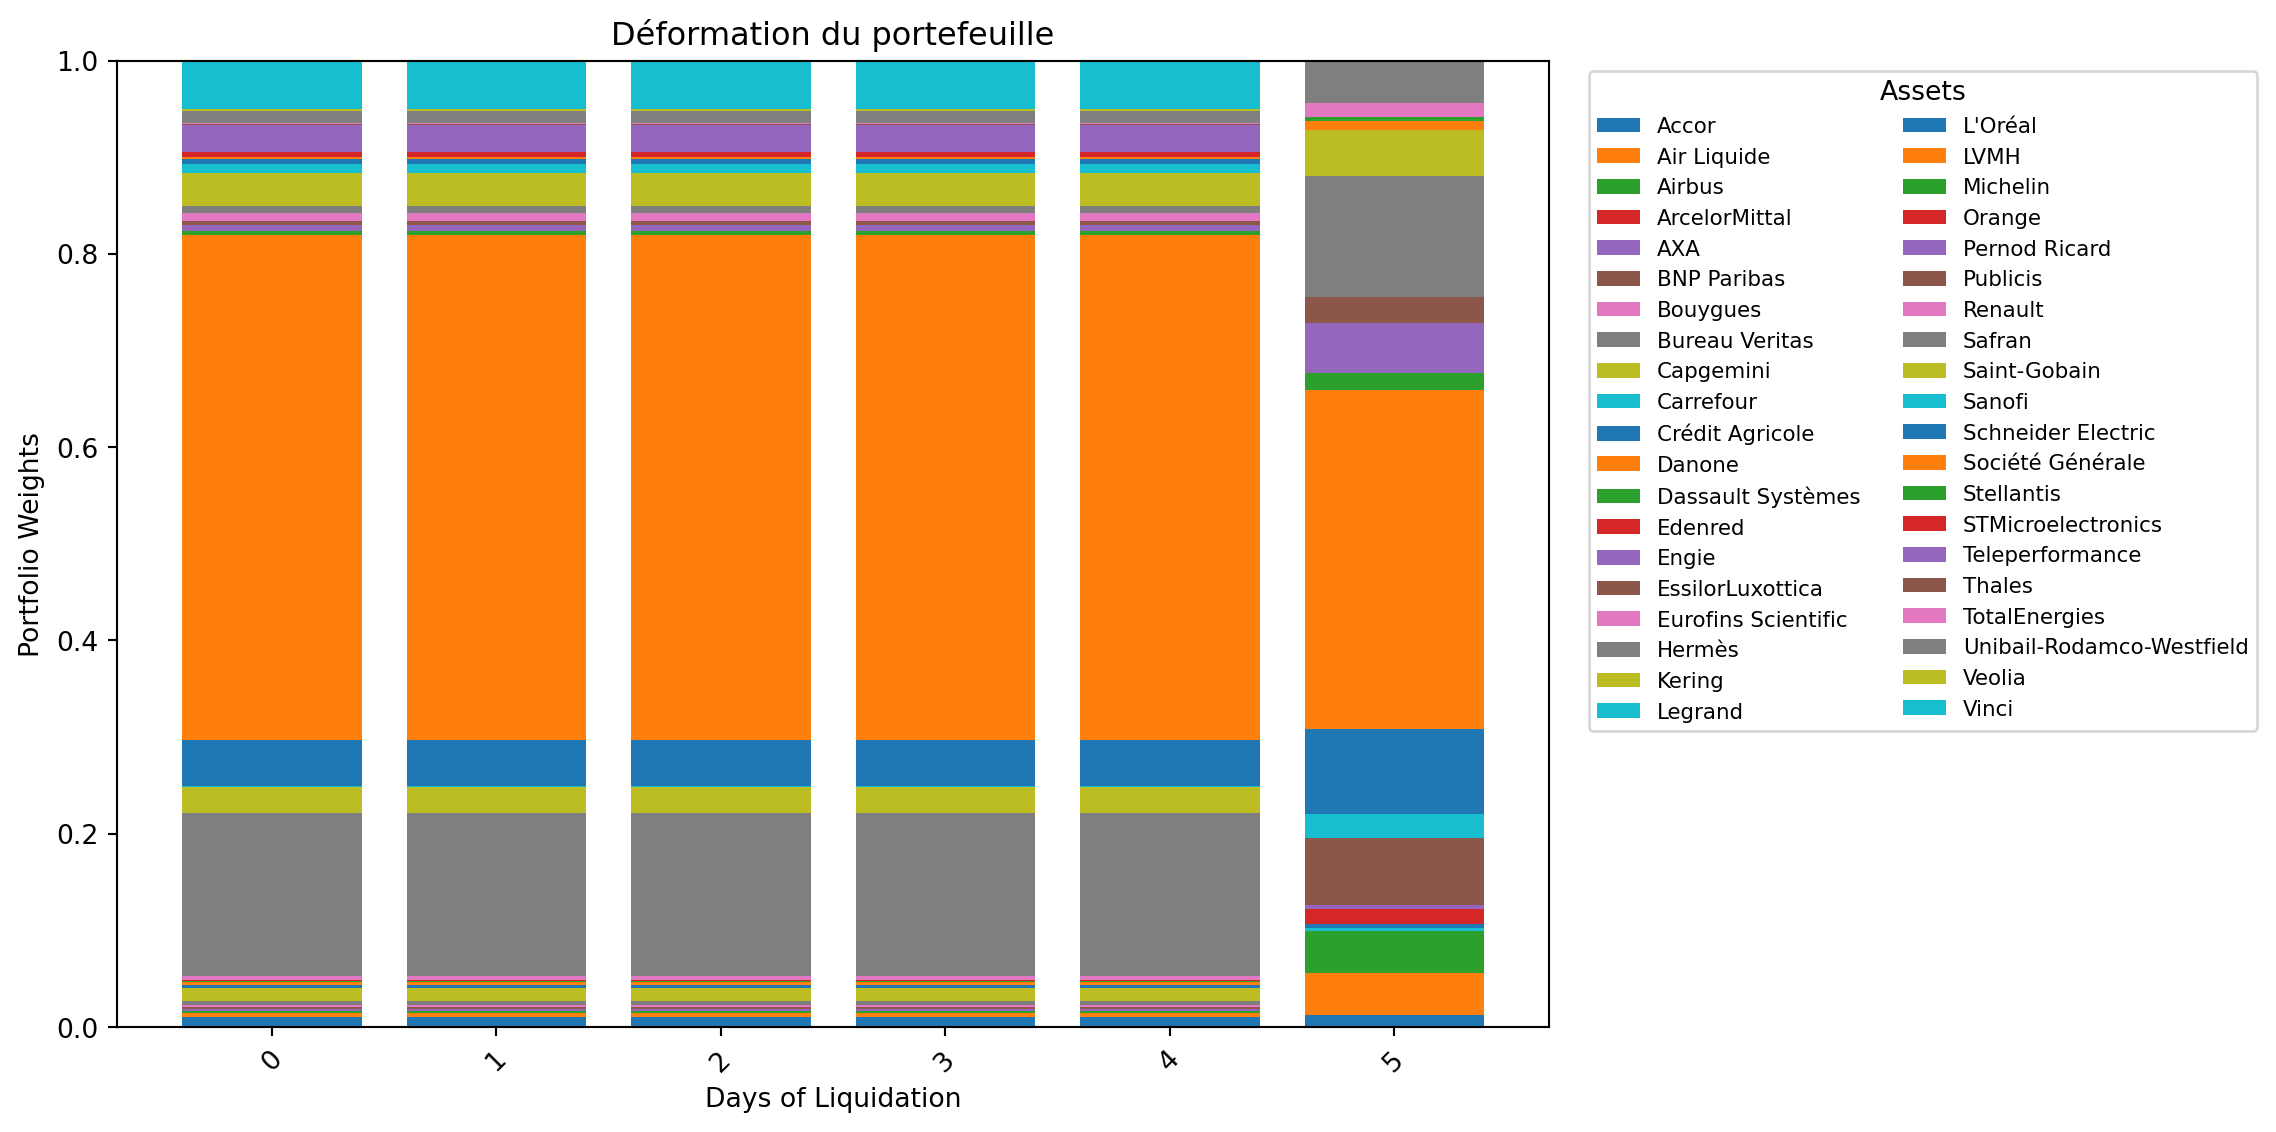

In [15]:
# Initialiser le graphique
plt.figure(figsize=(12, 6))

# Barplot empilé
bottom = None
for asset in weights.index:
    plt.bar(
        pd.to_numeric(weights.columns),  # Les jours
        weights.loc[asset],  # Poids de l'actif pour chaque jour
        bottom=bottom,  # Position de départ pour empiler les barres
        label=selected_assets[asset]  # Légende pour chaque actif
    )
    bottom = weights.loc[asset] if bottom is None else bottom + weights.loc[asset]

plt.xlabel("Days of Liquidation")
plt.ylabel("Portfolio Weights")
plt.title("Déformation du portefeuille")
plt.xticks(rotation=45)
plt.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=2)
plt.tight_layout()

plt.show()

In [16]:
# Valeur liquide du portefeuille
market_value_df = pd.DataFrame()

market_value_df["market_value"] = market_value.sum(axis=0)

# Calculer la valeur liquide relative par rapport au jour 0
market_value_df["relative value"] = market_value_df["market_value"] / market_value_df["market_value"].iloc[0]

# Calculer la valeur cumulée liquide relative du portefeuille
market_value_df["cumulative value"] = market_value_df["relative value"].cumsum() - 1

# Afficher le DataFrame résultant
print(market_value_df)

   market_value  relative value  cumulative value
0  1.091699e+10    1.000000e+00               0.0
1  2.183399e+09    2.000001e-01               0.2
2  2.183399e+09    2.000001e-01               0.4
3  2.183399e+09    2.000001e-01               0.6
4  2.183399e+09    2.000001e-01               0.8
5  2.183392e+09    1.999994e-01               1.0
6  3.893920e+03    3.566844e-07               1.0
7  0.000000e+00    0.000000e+00               1.0


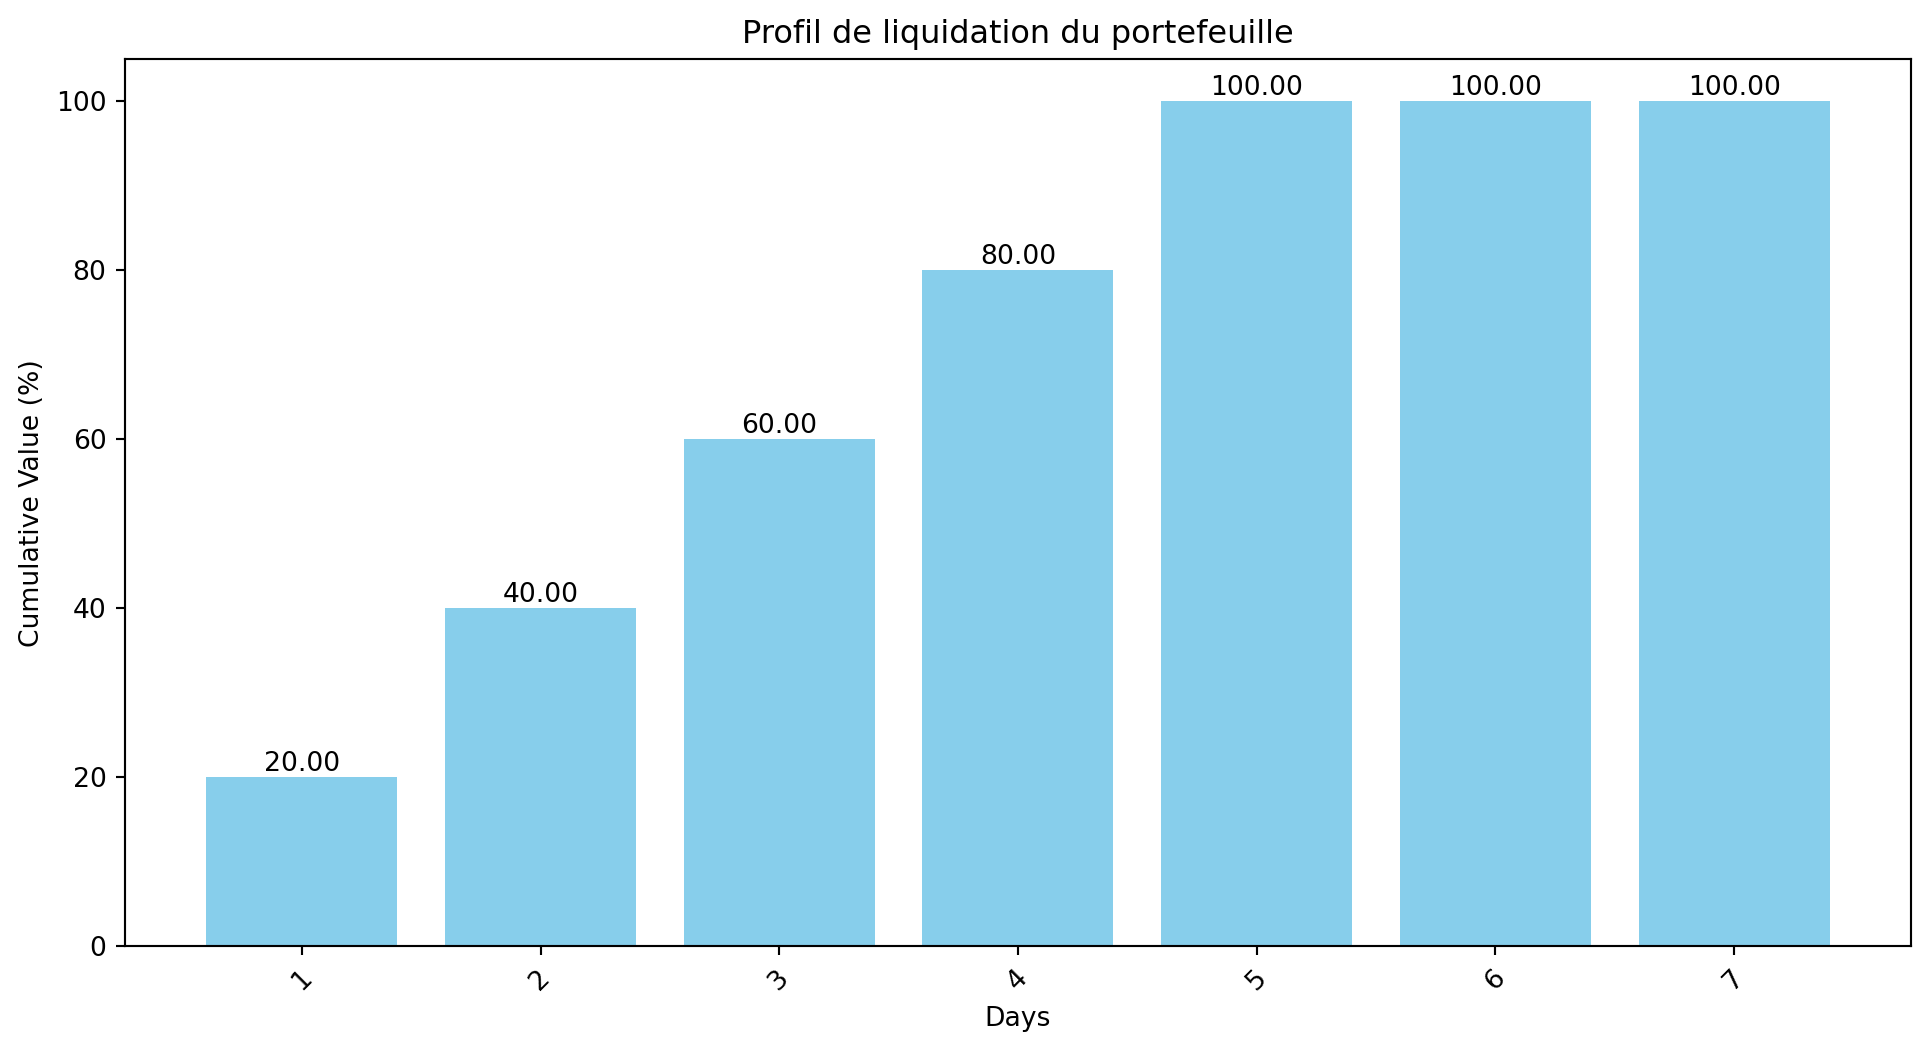

In [17]:
import matplotlib.pyplot as plt
market_value_df = market_value_df.iloc[1:]

plt.figure(figsize=(12, 6))
bars = plt.bar(market_value_df.index, market_value_df["cumulative value"] * 100, color="skyblue")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center text
        height,  # Position slightly above the bar
        f'{height:.2f}',  # Format with 2 decimal places
        ha='center',  # Center horizontally
        va='bottom',  # Position text at the bottom
        fontsize=10, color="black"
    )

# Set labels and title
plt.xlabel("Days")
plt.ylabel("Cumulative Value (%)")
plt.title("Profil de liquidation du portefeuille")
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def liquidation_profile(ADV, price_dict, selected_assets, fact_modulation=0.30,nb_liquidation=8, plot_graphs=True):
    """
    Calcule le profil de liquidation et visualise les graphiques des poids et des valeurs cumulées.
    
    Parameters:
        ADV (pd.DataFrame): DataFrame contenant les informations sur les actifs (Quantity, Quantity in 1day, etc.).
        price_dict (dict): Dictionnaire avec les prix des actifs (clé = actif, valeur = prix).
        selected_assets (list): Liste des actifs sélectionnés.
        fact_modulation (float): Facteur de modulation pour ajuster les quantités.
        plot_graphs (bool): Indique si les graphiques doivent être affichés.
    
    Returns:
        pd.DataFrame: DataFrame contenant les valeurs cumulées et relatives.
    """
    # Initialisation des quantités liquidées
    ADV = ADV.copy()
    ADV["Quantity liquidated"] = 0
    quantity_liquidated_per_day = [ADV["Quantity"] * fact_modulation]
    
    # Calcul des quantités liquidées par jour
    for _ in range(1, nb_liquidation+1):
        liquidated_today = np.minimum(
            ADV["Quantity in 1day"], 
            ADV["Quantity"] * fact_modulation - ADV["Quantity liquidated"]
        )
        ADV["Quantity liquidated"] += liquidated_today
        quantity_liquidated_per_day.append(liquidated_today)
    
    # Conversion des résultats en DataFrame
    liquidation_df = pd.DataFrame(quantity_liquidated_per_day).T
    liquidation_df.columns = [f"{i}" for i in range(len(quantity_liquidated_per_day))]
    
    # Calcul de la valeur liquide par actif et par jour
    market_value = [
        price_dict[ticker] * liquidation_df.loc[ticker]
        for ticker in selected_assets
    ]
    market_value = pd.DataFrame(market_value, index=selected_assets, columns=liquidation_df.columns)
    
    # Calcul des poids par jour
    # Calcul de la valeur de marché initiale et totale
    market_value_0 = market_value.iloc[:, 0]
    total_market_value_0 = market_value_0.sum()

    # Calcul de la valeur de marché cumulée (à partir de la colonne 1)
    cumsum_market_value = market_value.iloc[:, 1:].cumsum(axis=1)
    cumsum_total_market_value = market_value.iloc[:, 1:].sum(axis=0).cumsum()
    cumsum_market_value = pd.concat([pd.DataFrame(0, index=market_value.index, columns=[0]), cumsum_market_value], axis=1)
    cumsum_total_market_value = pd.concat([pd.Series(0, index=[0]), cumsum_total_market_value])

    weights = {}
    for ticker in selected_assets :
        weights[ticker] = (market_value_0.loc[ticker] - cumsum_market_value.loc[ticker]) / (total_market_value_0 - cumsum_total_market_value)

    weights = pd.DataFrame(weights).T
    
    # Visualisation des poids (barplot empilé)
    if plot_graphs:
        # Initialiser le graphique
        plt.figure(figsize=(12, 6))

        # Barplot empilé
        bottom = None
        for asset in weights.index:
            plt.bar(
                pd.to_numeric(weights.columns),  # Les jours
                weights.loc[asset],  # Poids de l'actif pour chaque jour
                bottom=bottom,  # Position de départ pour empiler les barres
                label=selected_assets[asset]  # Légende pour chaque actif
            )
            bottom = weights.loc[asset] if bottom is None else bottom + weights.loc[asset]

        plt.xlabel("Days of Liquidation")
        plt.ylabel("Portfolio Weights")
        plt.title("Déformation du portefeuille")
        plt.xticks(rotation=45)
        plt.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=2)
        plt.tight_layout()

        plt.show()

    
    # Création du DataFrame des valeurs de marché
    market_value_df = pd.DataFrame()
    market_value_df["market_value"] = market_value.sum(axis=0)
    
    # Calcul des valeurs relatives et cumulées
    market_value_df["relative value"] = market_value_df["market_value"] / market_value_df["market_value"].iloc[0]
    market_value_df["cumulative value"] = market_value_df["relative value"].cumsum() - 1
    market_value_df = market_value_df.iloc[1:]  # Retirer le jour 0 pour l'analyse cumulée
    
    # Visualisation de la valeur cumulative (barplot)
    if plot_graphs:
        plt.figure(figsize=(8, 4))
        plt.bar(market_value_df.index, market_value_df["cumulative value"] * 100, color="skyblue")
        plt.xlabel("Days")
        plt.ylabel("Cumulative Value (%)")
        plt.title("Profil de liquidation du portefeuille")
        plt.xticks(rotation=45)
        plt.show()
    return market_value_df, market_value, weights

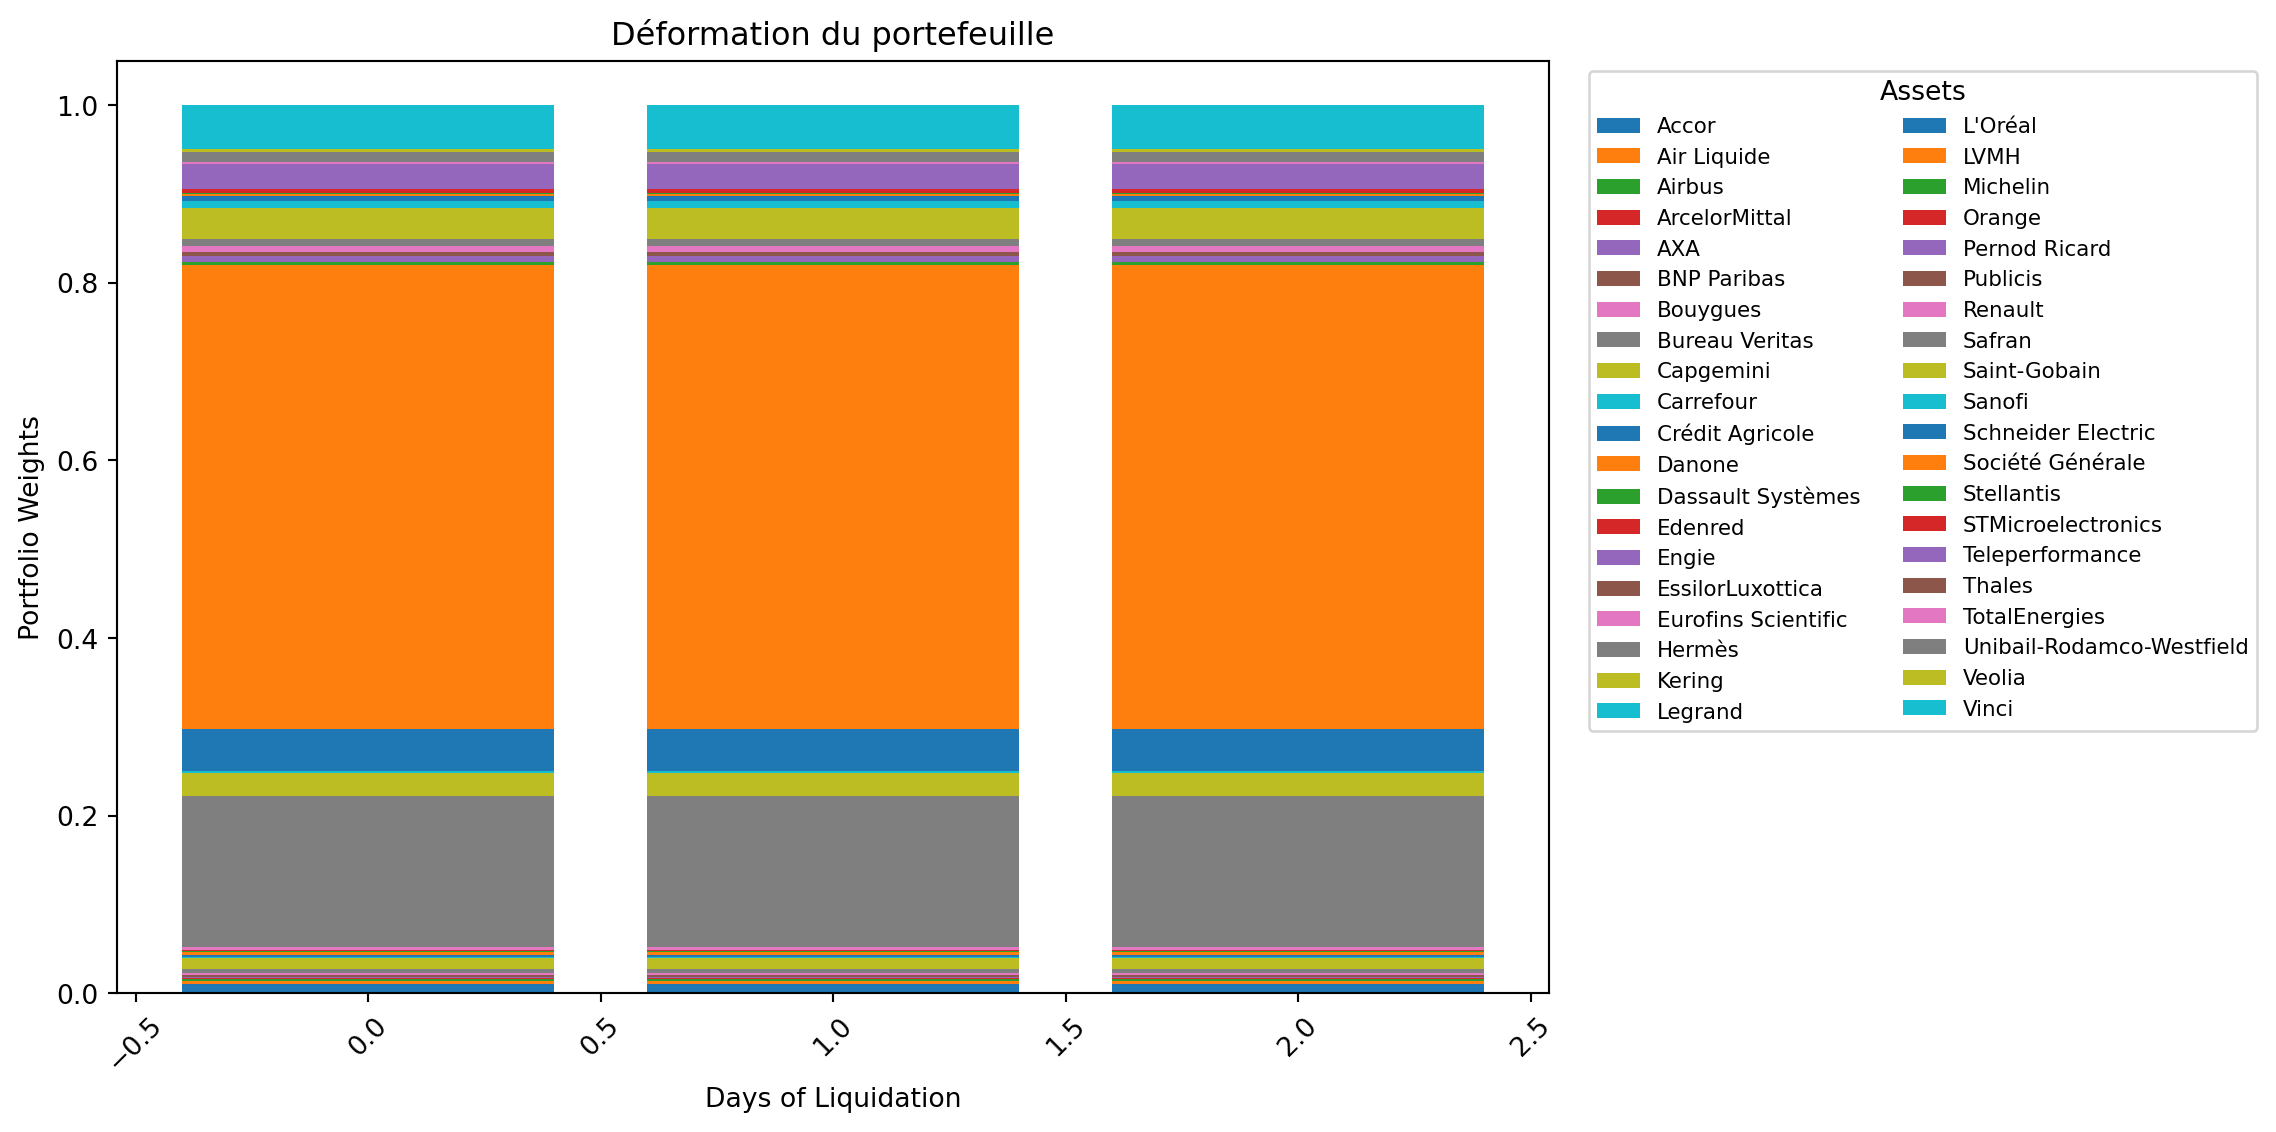

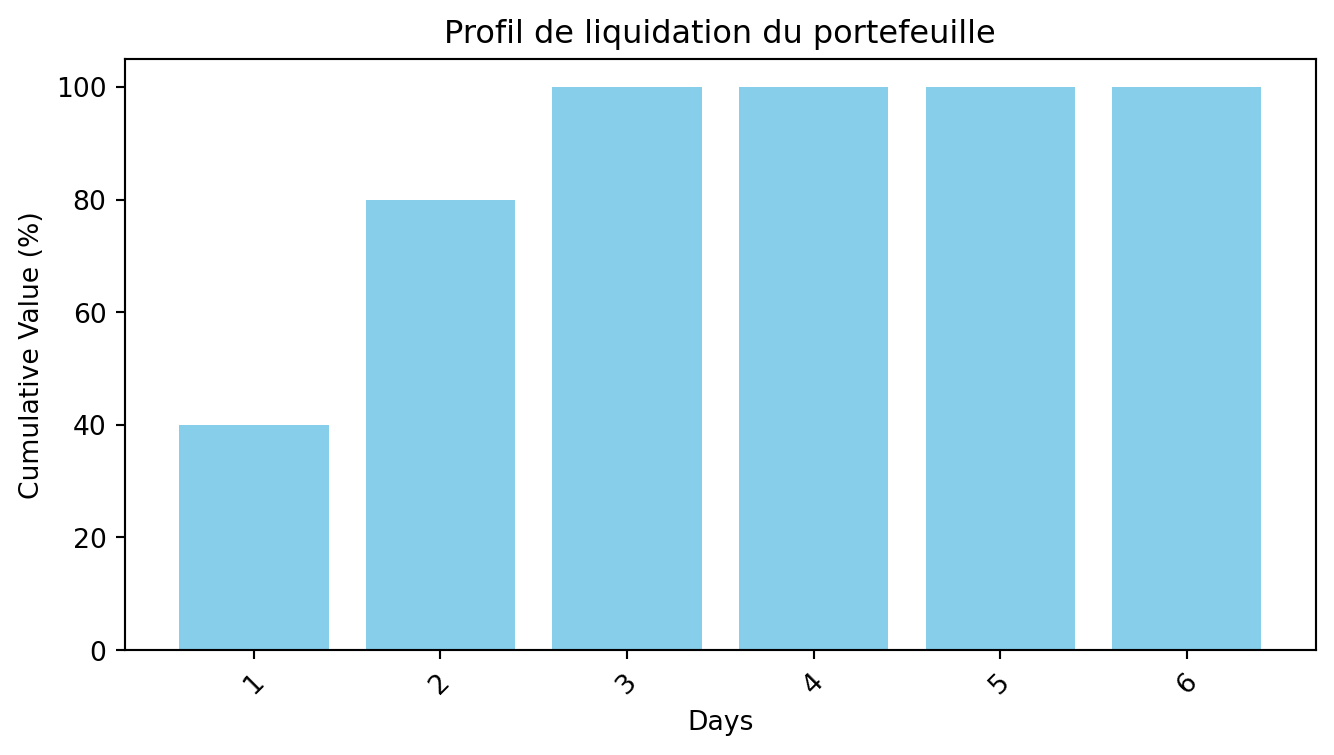

In [19]:
fact_modulation=0.5
nb_liquidation=6

new_market_value_df, new_market_value, new_weights = liquidation_profile(ADV, price_dict, selected_assets, fact_modulation, nb_liquidation, plot_graphs=True)

In [20]:
new_market_value.head()

,0,1,2,3,4,5,6
AC.PA,5.646475e+07,2.258589e+07,2.258589e+07,1.129297e+07,0.0,0.0,0.0
AI.PA,2.209477e+07,8.837873e+06,8.837873e+06,4.419021e+06,0.0,0.0,0.0
AIR.PA,1.091290e+07,4.365125e+06,4.365125e+06,2.182646e+06,0.0,0.0,0.0
MT.AS,2.589255e+06,1.035713e+06,1.035713e+06,5.178291e+05,0.0,0.0,0.0
CS.PA,1.152904e+07,4.611617e+06,4.611617e+06,2.305808e+06,0.0,0.0,0.0


In [21]:
# Calcul des ADV 3Mois

adv_3m = {portfolio_data[ticker].mean() for ticker in assets_ticker}

ADV_stressed = pd.DataFrame(adv_3m, index = assets_ticker, columns = ["ADV"])

# Génération des quantités
np.random.seed(42)
ADV_stressed["Quantity"] =  round(1.5 * np.random.uniform(0, 1, size=len(ADV)) * ADV["ADV"])

# Quantité journalière
market_depth = (20/100)/2  # On stresse la liquidité
ADV_stressed["Quantity in 1day"] = round(ADV_stressed["Quantity"] * market_depth)

# Calcul du nombre de jours de liquidation
ADV_stressed["Days of liquidation"] = ADV_stressed["Quantity"]/ADV_stressed["Quantity in 1day"]

# floor to 1 and round
ADV_stressed["Days of liquidation"] = ADV_stressed["Days of liquidation"].apply(lambda x: max(1, round(x)))

print(f"Temps de liquidation du portefeuille : {ADV_stressed['Days of liquidation'].max()} jours")

Temps de liquidation du portefeuille : 10 jours


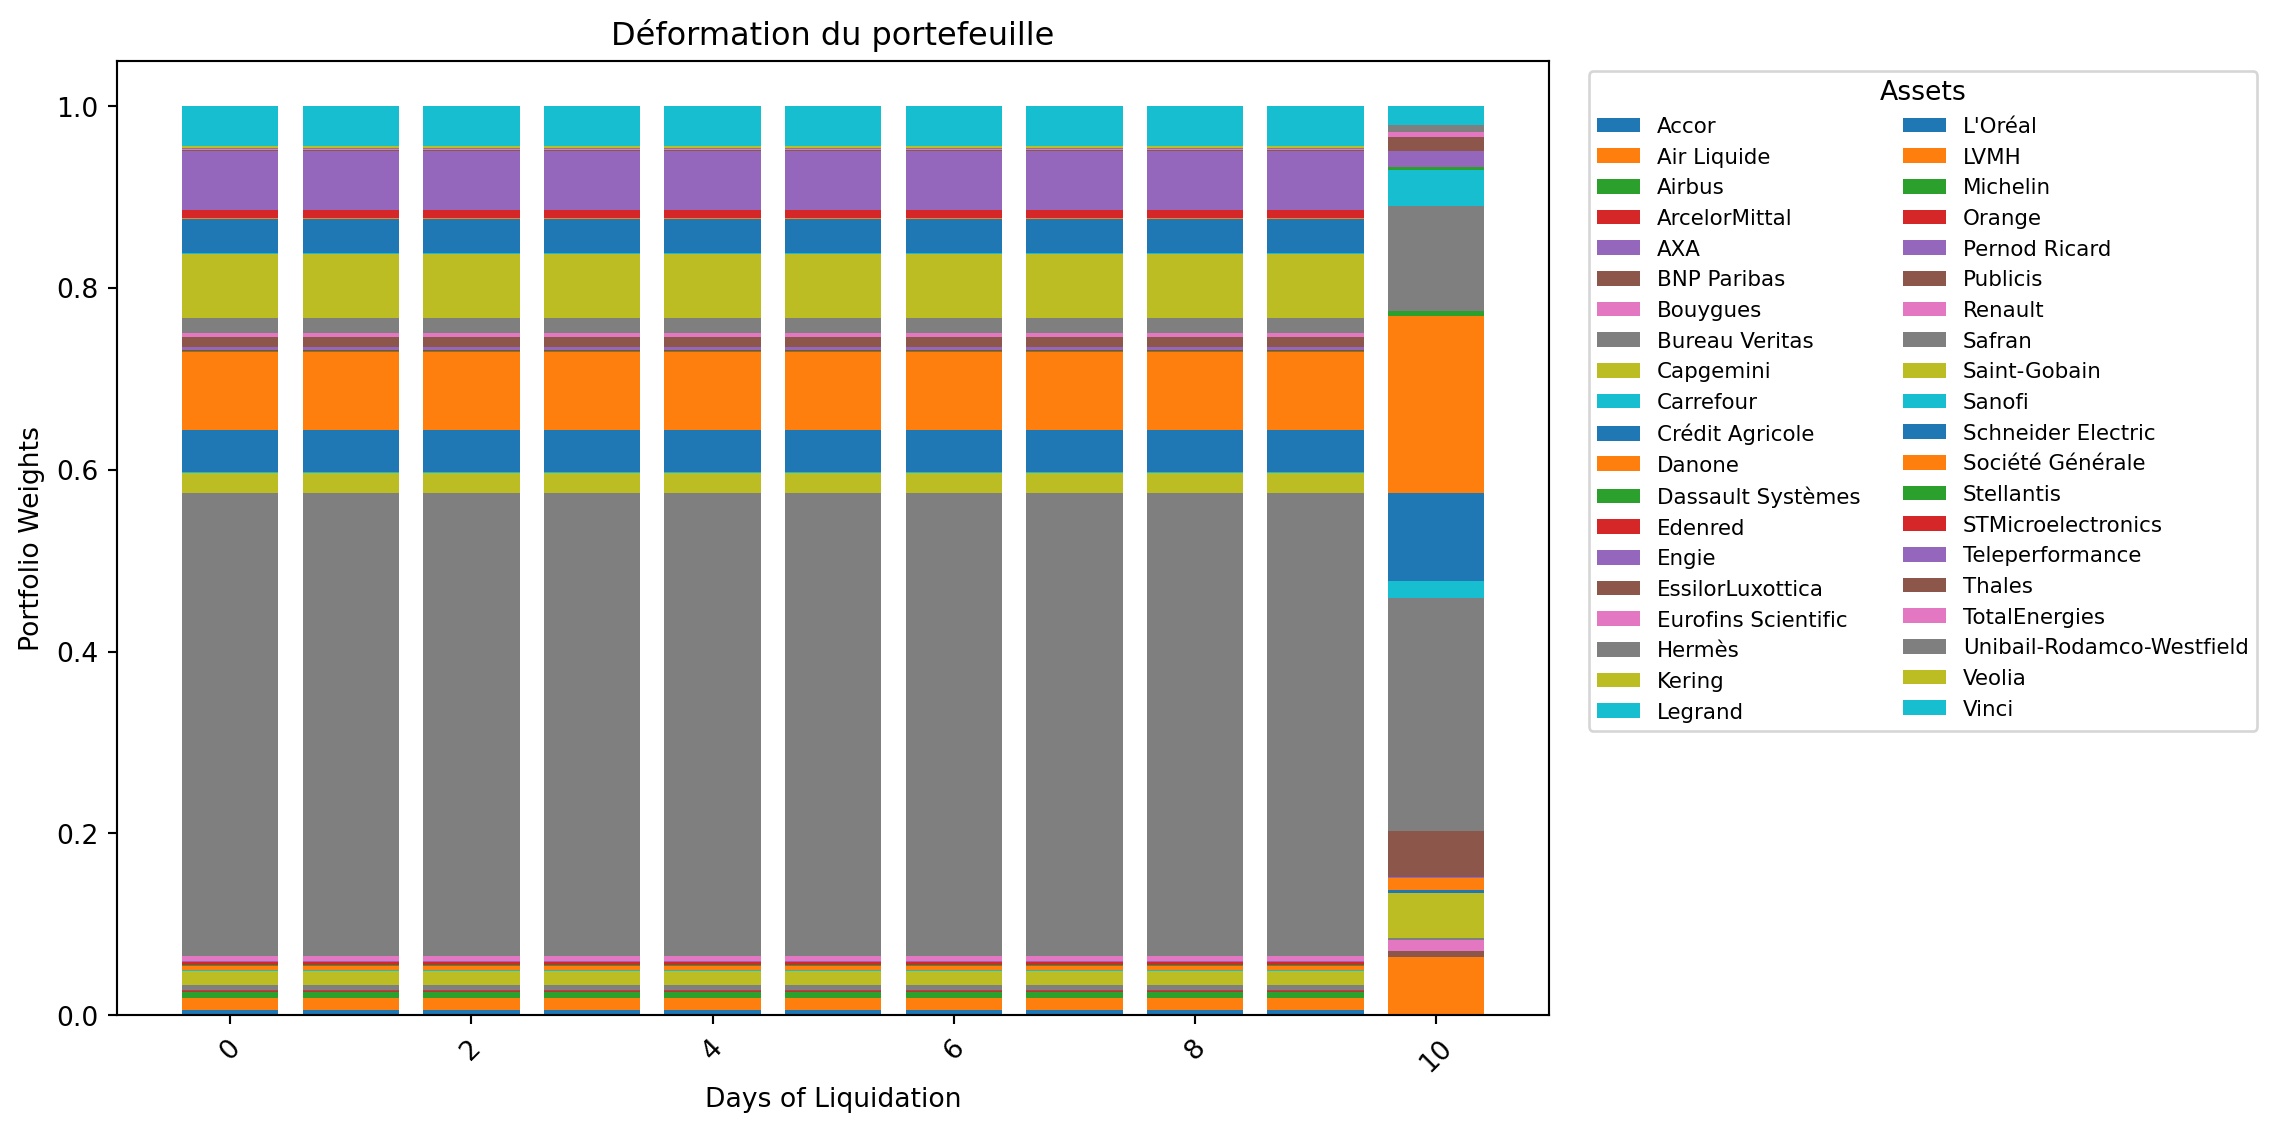

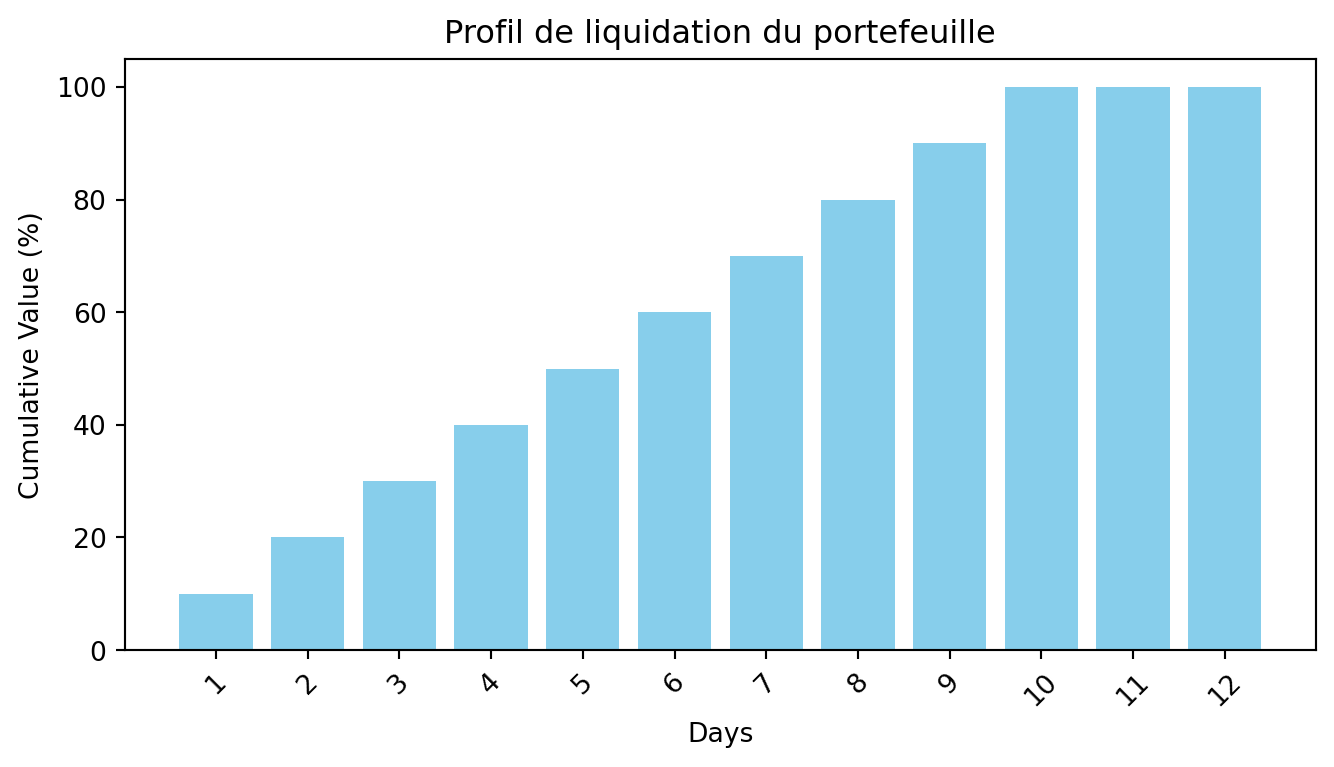

In [22]:
fact_modulation=1
nb_liquidation=12

stressed_market_value_df, stressed_market_value, stressed_weights = liquidation_profile(ADV_stressed, price_dict, selected_assets, fact_modulation, nb_liquidation, plot_graphs=True)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def liquidation_profile_pro_forma(ADV, price_dict, selected_assets, fact_modulation=0.30,nb_liquidation=8, plot_graphs=True):
    """
    Calcule le profil de liquidation et visualise les graphiques des poids et des valeurs cumulées.
    
    Parameters:
        ADV (pd.DataFrame): DataFrame contenant les informations sur les actifs (Quantity, Quantity in 1day, etc.).
        price_dict (dict): Dictionnaire avec les prix des actifs (clé = actif, valeur = prix).
        selected_assets (list): Liste des actifs sélectionnés.
        fact_modulation (float): Facteur de modulation pour ajuster les quantités.
        plot_graphs (bool): Indique si les graphiques doivent être affichés.
    
    Returns:
        pd.DataFrame: DataFrame contenant les valeurs cumulées et relatives.
    """
    # Initialisation des quantités liquidées
    ADV = ADV.copy()
    ADV["Quantity liquidated"] = 0
    quantity_liquidated_per_day = [ADV["Quantity"] * fact_modulation]
    
    # Calcul des quantités liquidées par jour
    for _ in range(1, nb_liquidation+1):        
        liquidated_today = np.minimum(
            ADV["Quantity in 1day"], 
            ADV["Quantity"] * fact_modulation - ADV["Quantity liquidated"]
        )
        min_liquidated_today = (liquidated_today/ADV["Quantity in 1day"]).min() # On liquide à la vitesse de l'actif le moins liquide
        ADV["Quantity liquidated"] += min_liquidated_today*liquidated_today
        quantity_liquidated_per_day.append(liquidated_today)
    
    # Conversion des résultats en DataFrame
    liquidation_df = pd.DataFrame(quantity_liquidated_per_day).T
    liquidation_df.columns = [f"{i}" for i in range(len(quantity_liquidated_per_day))]
    
    # Calcul de la valeur liquide par actif et par jour
    market_value = [
        price_dict[ticker] * liquidation_df.loc[ticker]
        for ticker in selected_assets
    ]
    market_value = pd.DataFrame(market_value, index=selected_assets, columns=liquidation_df.columns)
    
    # Calcul des poids par jour
    # Calcul de la valeur de marché initiale et totale
    market_value_0 = market_value.iloc[:, 0]
    total_market_value_0 = market_value_0.sum()

    # Calcul de la valeur de marché cumulée (à partir de la colonne 1)
    cumsum_market_value = market_value.iloc[:, 1:].cumsum(axis=1)
    cumsum_total_market_value = market_value.iloc[:, 1:].sum(axis=0).cumsum()
    cumsum_market_value = pd.concat([pd.DataFrame(0, index=market_value.index, columns=[0]), cumsum_market_value], axis=1)
    cumsum_total_market_value = pd.concat([pd.Series(0, index=[0]), cumsum_total_market_value])

    weights = {}
    for ticker in selected_assets :
        weights[ticker] = (market_value_0.loc[ticker] - cumsum_market_value.loc[ticker]) / (total_market_value_0 - cumsum_total_market_value)

    weights = pd.DataFrame(weights).T
    
    # Visualisation des poids (barplot empilé)
    if plot_graphs:
        # Initialiser le graphique
        plt.figure(figsize=(12, 6))

        # Barplot empilé
        bottom = None
        for asset in weights.index:
            plt.bar(
                pd.to_numeric(weights.columns),  # Les jours
                weights.loc[asset],  # Poids de l'actif pour chaque jour
                bottom=bottom,  # Position de départ pour empiler les barres
                label=selected_assets[asset]  # Légende pour chaque actif
            )
            bottom = weights.loc[asset] if bottom is None else bottom + weights.loc[asset]

        plt.xlabel("Days of Liquidation")
        plt.ylabel("Portfolio Weights")
        plt.title("Déformation du portefeuille")
        plt.xticks(rotation=45)
        plt.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=2)
        plt.tight_layout()

        plt.show()

    
    # Création du DataFrame des valeurs de marché
    market_value_df = pd.DataFrame()
    market_value_df["market_value"] = market_value.sum(axis=0)
    
    # Calcul des valeurs relatives et cumulées
    market_value_df["relative value"] = market_value_df["market_value"] / market_value_df["market_value"].iloc[0]
    market_value_df["cumulative value"] = market_value_df["relative value"].cumsum() - 1
    market_value_df = market_value_df.iloc[1:]  # Retirer le jour 0 pour l'analyse cumulée
    
    # Visualisation de la valeur cumulative (barplot)
    if plot_graphs:
        plt.figure(figsize=(8, 4))
        plt.bar(market_value_df.index, market_value_df["cumulative value"] * 100, color="skyblue")
        plt.xlabel("Days")
        plt.ylabel("Cumulative Value (%)")
        plt.title("Profil de liquidation du portefeuille")
        plt.xticks(rotation=45)
        plt.show()
    return market_value_df, market_value, weights

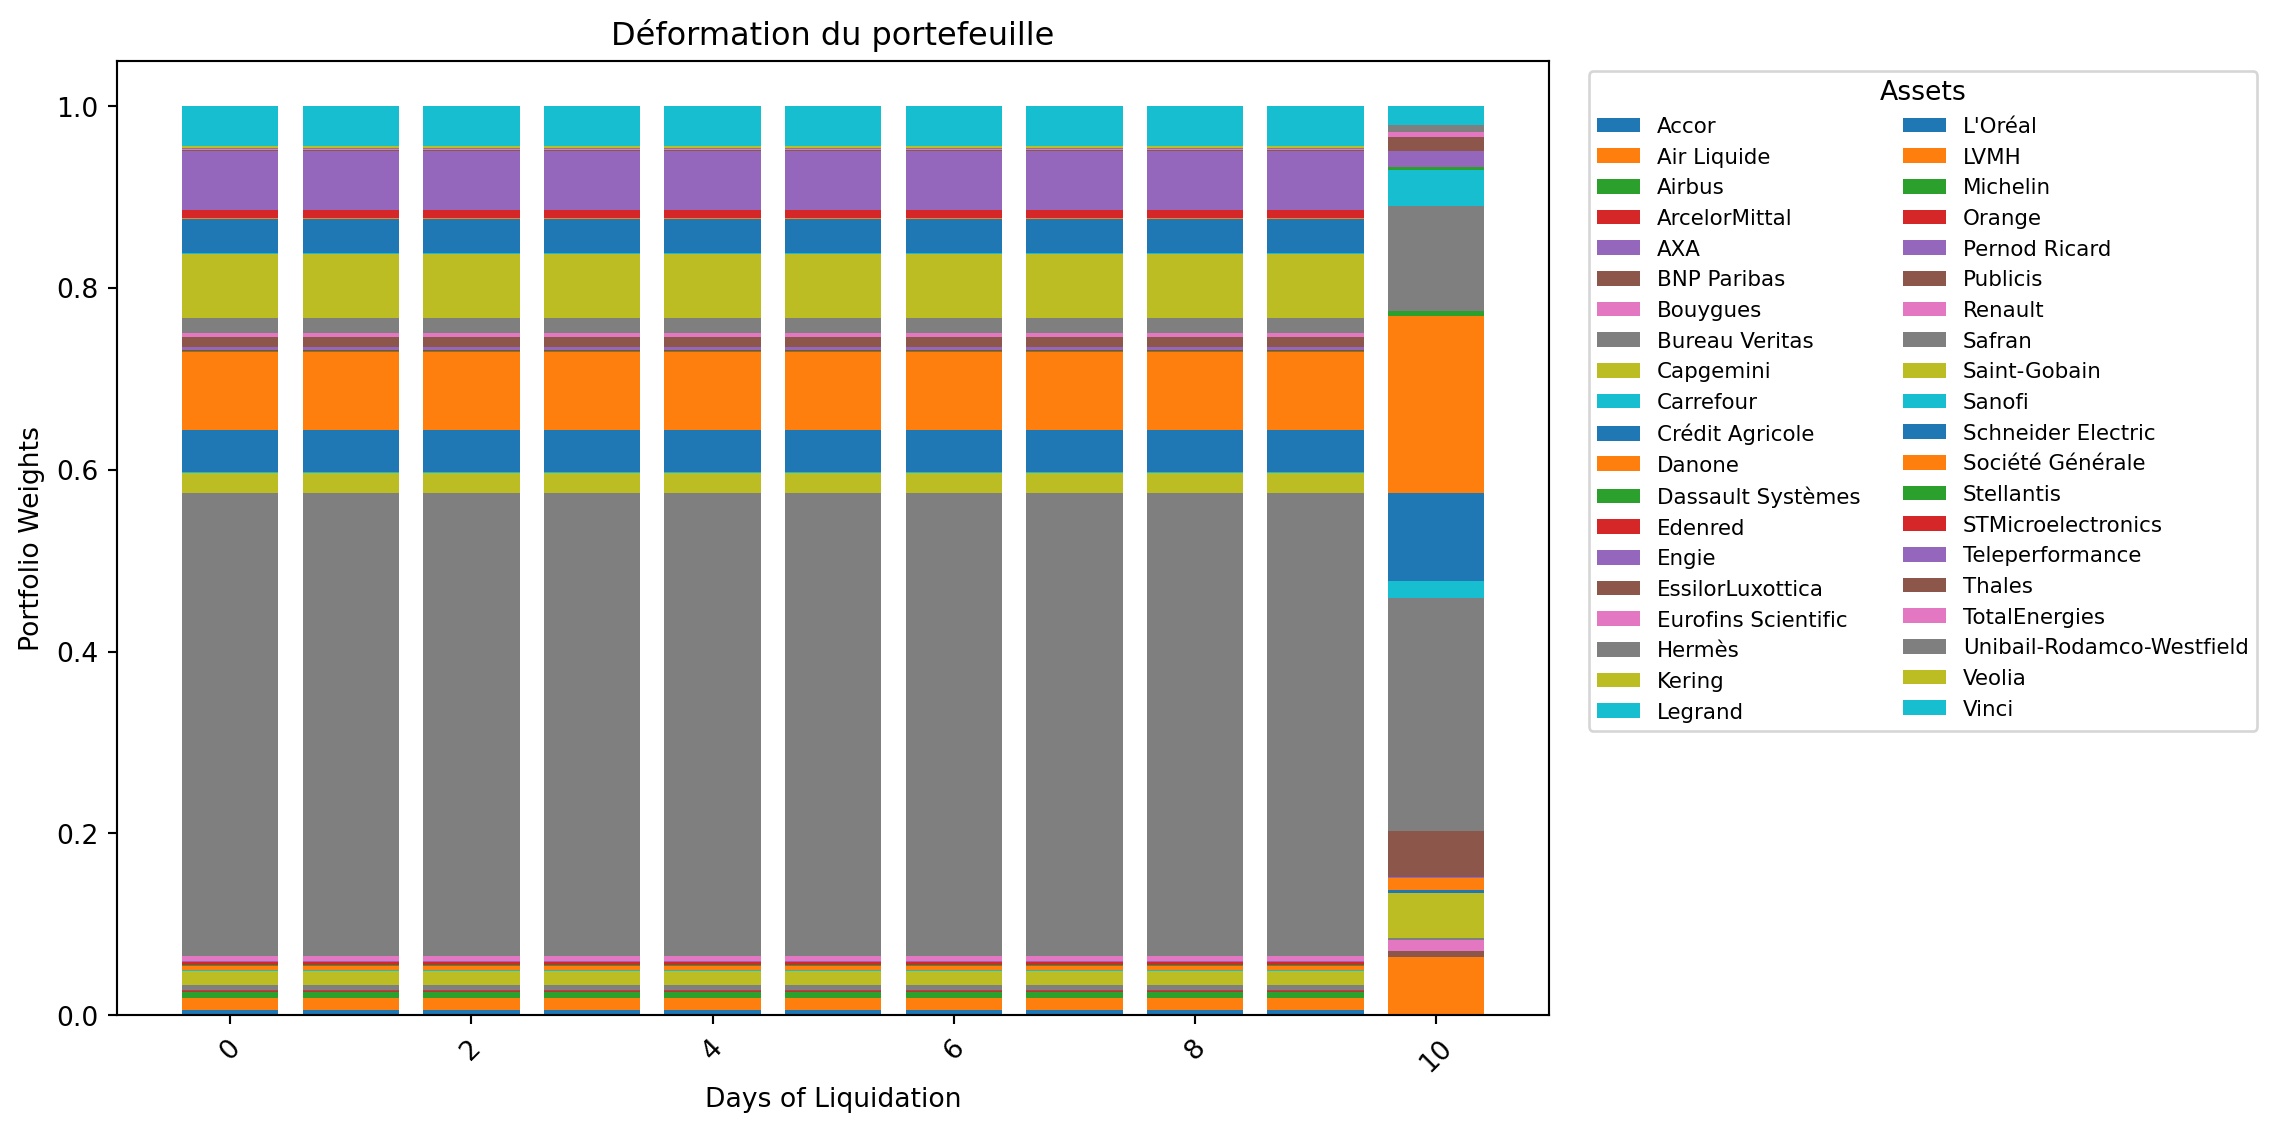

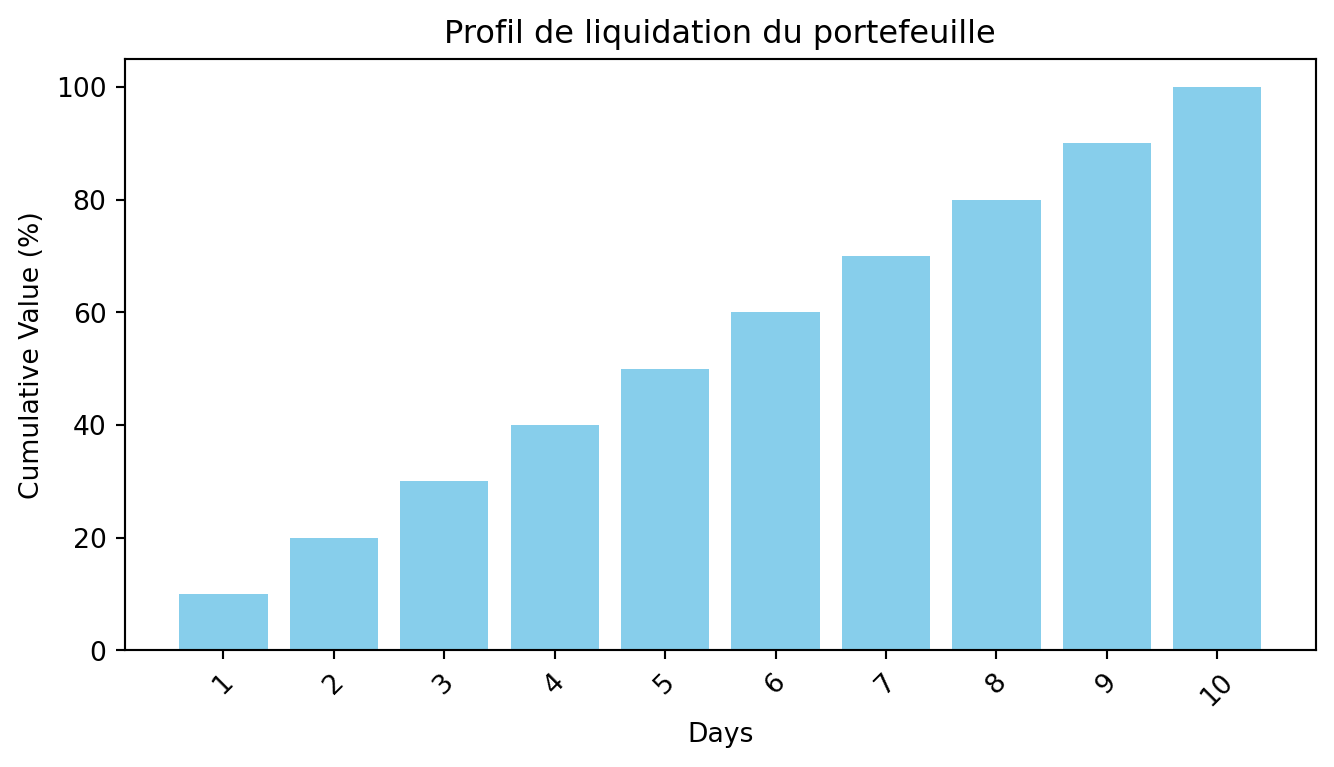

In [24]:
fact_modulation=1
nb_liquidation=10

stressed_market_value_df, stressed_market_value, stressed_weights = liquidation_profile_pro_forma(ADV_stressed, price_dict, selected_assets, fact_modulation, nb_liquidation, plot_graphs=True)